<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/GM_corn_analysis_with_normalised_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Cleaning and combining initial data (corn yield, acreage, are, GM corn %, Agricultural GDP)

!mkdir datafinal
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/real%20gdp%20by%20state%20agriculture.csv -o ./datafinal/real_gdp_by_state_agriculture.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/alltablesGEcrops.csv -o ./datafinal/GM_crops_%.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/final%20corn%20data.csv -o ./datafinal/final_corn_data.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/Total%20crop%20acreage.csv -o ./datafinal/Total_crop_acreage.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/acres%20operated%20by%20state.csv -o ./datafinal/acres_operated_by_state.csv

!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/employment%20and%20wage%20agri.csv -o ./datafinal/employment_and_wage_agri.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/EXPORTS.csv -o ./datafinal/exports.csv

In [2]:
gm_crops = pd.read_csv('/content/GM crops %.csv')

In [3]:
corn = pd.read_csv('/content/final corn data.csv')

In [4]:
gdp_agri = pd.read_csv('/content/real gdp by state agriculture.csv')

Other values are also saved as dataframes, which will be used to normalise agricultural GDP and to see which other ones contribute to agricultural GDP other than GM corn production

In [5]:
crops_planted_acreage =pd.read_csv('/content/Total crop acreage.csv')

In [6]:
acres_operated = pd.read_csv('/content/acres operated by state.csv')

In [7]:
jobs_and_wage = pd.read_csv('/content/employment and wage agri.csv')

In [8]:
exports = pd.read_csv('/content/EXPORTS.csv')

In [9]:
population = pd.read_csv('/content/population by state.csv')

Cleaning the GM crop and corn data, merging them together

In [10]:
gm_crops.head()

,Table,Unit,Variety,Year,Attribute,Value
0,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


In [11]:
#gm_crops=gm_crops.drop(columns='Table')

In [12]:
gm_crops["Value"].replace({".": "0"}, inplace=True)
gm_crops["Value"].replace({"*": "0"}, inplace=True)

In [13]:
gm_crops.dtypes

Table        object
Unit         object
Variety      object
Year          int64
Attribute    object
Value        object
dtype: object

In [14]:
gm_crops["Value"] = gm_crops["Value"].astype(float).astype(int)

In [15]:
gm_crops.dtypes

Table        object
Unit         object
Variety      object
Year          int64
Attribute    object
Value         int64
dtype: object

In [16]:
corn.head()

,Year,State,Unnamed: 2,Area planted,Area harvested for grain,Yield,Production
0,2005,Alabama,NaN,220,200,119,23800
1,2005,Arizona,NaN,50,22,195,4290
2,2005,Arkansas,NaN,240,230,131,30130
3,2005,California,NaN,560,130,172,22360
4,2005,Colorado,NaN,1100,950,148,140600


In [17]:
corn=corn.drop(columns='Unnamed: 2')

In [18]:
corn.dtypes

Year                         int64
State                       object
Area planted                 int64
Area harvested for grain    object
Yield                       object
Production                  object
dtype: object

In [19]:
corn["Area harvested for grain"].replace({"(NA)": "0"}, inplace=True) 
corn["Area harvested for grain"].replace({"": "0"}, inplace=True) 
corn["Yield"].replace({"(NA)": "0"}, inplace=True) 
corn["Yield"].replace({"(NA)": "0"}, inplace=True) 
corn["Production"].replace({"(NA)": "0"}, inplace=True) 
corn["Production"].replace({"": "0"}, inplace=True)


In [20]:
corn["Area harvested for grain"].replace({"NA": "0"}, inplace=True) 

In [21]:
corn["Area harvested for grain"].replace({"inf": "0"}, inplace=True) 

In [22]:
corn = corn.fillna(0)

In [23]:
corn["Area harvested for grain"].astype(float).astype(int)

0        200
1         22
2        230
3        130
4        950
       ...  
730       90
731       38
732     2680
733       67
734    81482
Name: Area harvested for grain, Length: 735, dtype: int64

In [24]:
corn["Yield"] = corn["Yield"].astype(float).astype(int)
corn["Production"] = corn["Production"].astype(float).astype(int)

In [25]:
gm_crops['Attribute'].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin', 'Other States', 'U.S.', 'Alabama',
       'Arkansas', 'California', 'Georgia', 'Louisiana', 'Mississippi',
       'North Carolina', 'Tennessee'], dtype=object)

In [26]:
corn['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas ', 'California', 'Colorado ',
       'Connecticut ', 'Delaware', 'Florida ', 'Georgia ', 'Idaho ',
       'Illinois ', 'Indiana', 'Iowa ', 'Kansas ', 'Kentucky ',
       'Louisiana', 'Maine ', 'Maryland ', 'Massachusetts ', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri ', 'Montana ', 'Nebraska',
       'Nevada ', 'New Hampshire ', 'New Jersey ', 'New Mexico ',
       'New York ', 'North Carolina', 'North Dakota ', 'Ohio ',
       'Oklahoma', 'Oregon ', 'Pennsylvania ', 'Rhode Island ',
       'South Carolina', 'South Dakota ', 'Tennessee ', 'Texas ', 'Utah ',
       'Vermont ', 'Virginia ', 'Washington', 'West Virginia ',
       'Wisconsin ', 'Wyoming ', 'United States'], dtype=object)

In [27]:
corn['State'].replace({'Arkansas ': 'Arkansas'}, inplace=True)

In [28]:
corn['State'].replace({'Colorado ': 'Colorado', 'Connecticut ':'Conneticut', 'Florida ':'Florida','Georgia ':'Georgia', 'Idaho ':'Idaho', 'Illinois ':'Illinois', 'Iowa ':'Iowa','Kansas ':'Kansas','Kentucky ':'Kentucky', 'Maine ':'Maine', 'Massachusetts ':'Massachusetts','Missouri ':'Missouri','North Dakota ':'North Dakota','Ohio ':'Ohio','South Dakota ':'South Dakota','Texas ':'Texas', 'Wisconsin ':'Wisconsin'}, inplace=True)

In [29]:
corn['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Conneticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland ', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana ', 'Nebraska', 'Nevada ',
       'New Hampshire ', 'New Jersey ', 'New Mexico ', 'New York ',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon ',
       'Pennsylvania ', 'Rhode Island ', 'South Carolina', 'South Dakota',
       'Tennessee ', 'Texas', 'Utah ', 'Vermont ', 'Virginia ',
       'Washington', 'West Virginia ', 'Wisconsin', 'Wyoming ',
       'United States'], dtype=object)

In [30]:
corn['State'].replace({'Maryland ': 'Maryland', 'Nevada ':'Nevada','New Hampshire ':'New Hampshire', 'New Jersey ':'New Jersey','New Mexico ':'New Mexico', 'New York ':'New York', 'Oregon ':'Oregon','Pennsylvania ':'Pennsylvania','Rhode Island ':'Rhode Island', 'Tennessee ':'Tennessee','Utah ':'Utah','Vermont ':'Vermont','Virginia ':'Virginia','West Virginia ':'West Virginia','Wyoming ':'Wyoming'}, inplace=True)

In [31]:
gm_crops['Attribute'].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin', 'Other States', 'U.S.', 'Alabama',
       'Arkansas', 'California', 'Georgia', 'Louisiana', 'Mississippi',
       'North Carolina', 'Tennessee'], dtype=object)

In [32]:
gm_crops.tail(50)

,Table,Unit,Variety,Year,Attribute,Value
2890,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2017,Other States,94
2891,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2017,U.S.,94
2892,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Arkansas,97
2893,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Illinois,93
2894,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Indiana,91
2895,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Iowa,95
2896,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Kansas,95
2897,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Michigan,93
2898,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Minnesota,95
2899,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Mississippi,99


In [33]:
gm_crops = gm_crops[gm_crops['Variety']=='All GE varieties']

In [34]:
gm_crops[gm_crops['Year']== 2005]

,Table,Unit,Variety,Year,Attribute,Value
1020,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Illinois,36
1021,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Indiana,26
1022,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Iowa,60
1023,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Kansas,63
1024,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Michigan,40
1025,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Minnesota,66
1026,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Missouri,55
1027,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Nebraska,69
1028,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,North Dakota,75
1029,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2005,Ohio,18


In [37]:
gm_2005 = gm_crops[gm_crops['Year']== 2005]

In [38]:
gm_corn = gm_crops[(gm_crops['Unit']=='Percent of corn planted')&(gm_crops['Variety']=='All GE varieties')]

In [39]:
gm_corn["Attribute"].replace({"U.S.": "United States"}, inplace=True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [40]:
gm_corn["Attribute"].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin', 'Other States', 'United States'],
      dtype=object)

In [41]:
corn['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Conneticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana ', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'United States'],
      dtype=object)

---

# Merging data for corn table

Next step is to merge all the dataframes and calculate the actual level of GM crop area by multiplying the percentage and the total corn area planted

In [42]:
corn_table = corn.merge(gm_corn, how='inner', left_on=['Year', 'State'], right_on=['Year', 'Attribute'])

In [43]:
corn_table_final = corn.merge(gm_corn, how='outer', left_on=['Year', 'State'], right_on=['Year', 'Attribute'])

In [44]:
corn_table_final.tail(50)

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value
790,2003,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,South Dakota,75.0
791,2003,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Texas,0.0
792,2003,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Wisconsin,32.0
793,2003,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Other States,36.0
794,2003,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,40.0
795,2004,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Illinois,33.0
796,2004,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Indiana,21.0
797,2004,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Iowa,54.0
798,2004,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Kansas,54.0
799,2004,NaN,NaN,NaN,NaN,NaN,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Michigan,33.0


In [45]:
corn_table_clean = corn_table_final[(corn_table_final['Year']>=2005) & (corn_table_final['Year']!=2020)]

In [46]:
corn_table_clean.drop(columns=['Table','Unit', 'Variety'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
corn_table_clean.loc[corn_table_clean.Attribute == 'Other States']
                     

,Year,State,Area planted,Area harvested for grain,Yield,Production,Attribute,Value
810,2005,NaN,NaN,NaN,NaN,NaN,Other States,44.0
811,2006,NaN,NaN,NaN,NaN,NaN,Other States,55.0
812,2007,NaN,NaN,NaN,NaN,NaN,Other States,67.0
813,2008,NaN,NaN,NaN,NaN,NaN,Other States,74.0
814,2009,NaN,NaN,NaN,NaN,NaN,Other States,78.0
815,2010,NaN,NaN,NaN,NaN,NaN,Other States,82.0
816,2011,NaN,NaN,NaN,NaN,NaN,Other States,86.0
817,2012,NaN,NaN,NaN,NaN,NaN,Other States,85.0
818,2013,NaN,NaN,NaN,NaN,NaN,Other States,88.0
819,2014,NaN,NaN,NaN,NaN,NaN,Other States,91.0


In [48]:
i = corn_table_clean.loc[810, 'Value']

In [49]:
corn_table_clean.loc[corn_table_clean.Year == 2005, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2005, 'Value'].fillna(i)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [50]:
i1 = corn_table_clean.loc[811, 'Value']
i2 = corn_table_clean.loc[812, 'Value']
i3 = corn_table_clean.loc[813, 'Value']
i4 = corn_table_clean.loc[814, 'Value']
i5 = corn_table_clean.loc[815, 'Value']
i6 = corn_table_clean.loc[816, 'Value']
i7 = corn_table_clean.loc[817, 'Value']
i8 = corn_table_clean.loc[818, 'Value']
i9 = corn_table_clean.loc[819, 'Value']
i10 = corn_table_clean.loc[820, 'Value']
i11 = corn_table_clean.loc[821, 'Value']
i12 = corn_table_clean.loc[822, 'Value']
i13 = corn_table_clean.loc[823, 'Value']
i14 = corn_table_clean.loc[824, 'Value']

corn_table_clean.loc[corn_table_clean.Year == 2006, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2006, 'Value'].fillna(i1)
corn_table_clean.loc[corn_table_clean.Year == 2007, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2007, 'Value'].fillna(i2)
corn_table_clean.loc[corn_table_clean.Year == 2008, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2008, 'Value'].fillna(i3)
corn_table_clean.loc[corn_table_clean.Year == 2009, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2009, 'Value'].fillna(i4)
corn_table_clean.loc[corn_table_clean.Year == 2010, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2010, 'Value'].fillna(i5)
corn_table_clean.loc[corn_table_clean.Year == 2011, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2011, 'Value'].fillna(i6)
corn_table_clean.loc[corn_table_clean.Year == 2012, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2012, 'Value'].fillna(i7)
corn_table_clean.loc[corn_table_clean.Year == 2013, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2013, 'Value'].fillna(i8)
corn_table_clean.loc[corn_table_clean.Year == 2014, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2014, 'Value'].fillna(i9)
corn_table_clean.loc[corn_table_clean.Year == 2015, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2015, 'Value'].fillna(i10)
corn_table_clean.loc[corn_table_clean.Year == 2016, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2016, 'Value'].fillna(i11)
corn_table_clean.loc[corn_table_clean.Year == 2017, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2017, 'Value'].fillna(i12)
corn_table_clean.loc[corn_table_clean.Year == 2018, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2018, 'Value'].fillna(i13)
corn_table_clean.loc[corn_table_clean.Year == 2019, 'Value'] = corn_table_clean.loc[corn_table_clean.Year == 2019, 'Value'].fillna(i14)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [51]:
corn_table_clean.drop(index=[810,811,812,813,814,815,816,817,818, 819,820, 821, 822, 823, 824], axis =0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
corn_table_clean.drop(columns='Attribute', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
corn_table_clean["Area planted"] = corn_table_clean["Area planted"].astype(float).astype(int)
corn_table_clean["Area harvested for grain"] = corn_table_clean["Area harvested for grain"].astype(float).astype(int)
corn_table_clean["Yield"] = corn_table_clean["Yield"].astype(float).astype(int)
corn_table_clean["Production"] = corn_table_clean["Production"].astype(float).astype(int)
corn_table_clean["Value"] = corn_table_clean["Value"].astype(float).astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In order to multiply the percentage by the total area to get the GM corn area, I divided the percenatage to get a decimal and added another column

In [54]:
corn_table_clean['Value'] = corn_table_clean['Value'].div(100).round(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
corn_table['Value'] = corn_table['Value'].div(100).round(2)

In [56]:
corn_table_clean["GM corn area"] = corn_table_clean["Area planted"] * corn_table_clean["Value"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
corn_table["GM corn area"] = corn_table["Area planted"] * corn_table["Value"]

To have the variables in their initial values (in the orginal dataset they were divided by 1000)

In [58]:
corn_table_clean['GM corn area'] = corn_table_clean['GM corn area']*1000
corn_table_clean['Production'] = corn_table_clean['Production']*1000
corn_table_clean['Area planted'] = corn_table_clean['Area planted']*1000
corn_table_clean['Area harvested for grain'] = corn_table_clean['Area harvested for grain']*1000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

---

In [59]:
gdp_agri.head()

,Year,State,Agri GDP
0,2005,United States,196126.0
1,2005,Alabama,3837.0
2,2005,Alaska,417.0
3,2005,Arizona,3019.6
4,2005,Arkansas,4282.6


In [60]:
gdp_agri.dtypes

Year          int64
State        object
Agri GDP    float64
dtype: object

In [61]:
gdp_agri["Agri GDP"] = gdp_agri["Agri GDP"].astype(int)

In [62]:
corn_table = corn_table.merge(gdp_agri, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [63]:
data_all_states = corn_table_clean.merge(gdp_agri, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [64]:
data_all_states.drop(columns='Value', inplace=True)

In [65]:
data_all_states['Agri GDP'] = data_all_states['Agri GDP']*1000000

In [66]:
corn_general = corn_table[(corn_table['State']=='United States')]

data_all_states["Value"] = data_all_states["Value"].astype(float).astype(int)

In [67]:

data_all_states["GM corn area"] = data_all_states["GM corn area"].astype(float).astype(int)

Export the second dataframe (data_all_states), which has estimated values to use in other google colabs

In [68]:
data_all_states.to_csv('/content/sample_data/data_all_states.csv')

# Exploratory analysis with scatterplots

In [69]:
corn_table1 = corn_table[corn_table['State']!='United States']

In [70]:
corn_table1 = corn_table1[corn_table1['State']!='Texas']

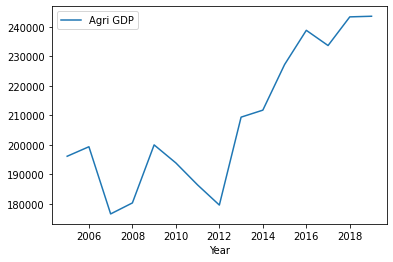

In [71]:
corn_general.plot(x= 'Year', y = 'Agri GDP')

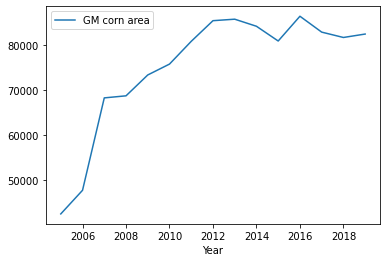

In [72]:
corn_general.plot(x= 'Year', y = 'GM corn area')

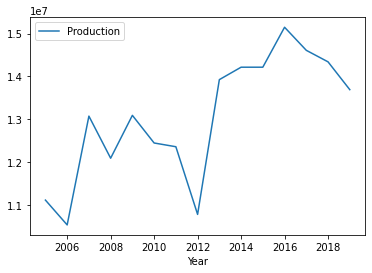

In [73]:
corn_general.plot(x= 'Year', y = 'Production')

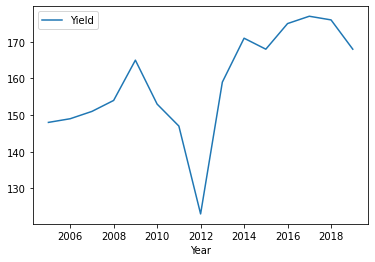

In [74]:
corn_general.plot(x= 'Year', y = 'Yield')

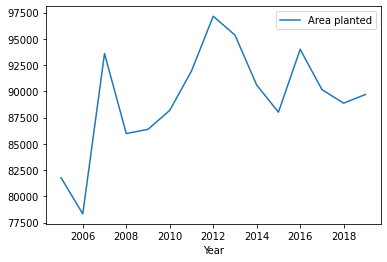

In [75]:
corn_general.plot(x= 'Year', y = 'Area planted')

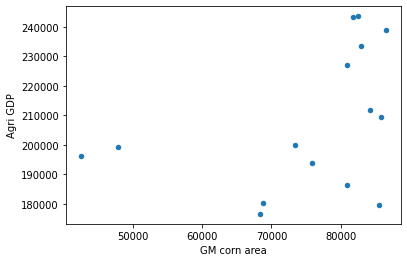

In [76]:
corn_general.plot.scatter(x= 'GM corn area', y = 'Agri GDP')

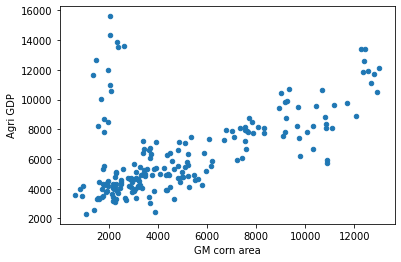

In [77]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='GM corn area', y ='Agri GDP')

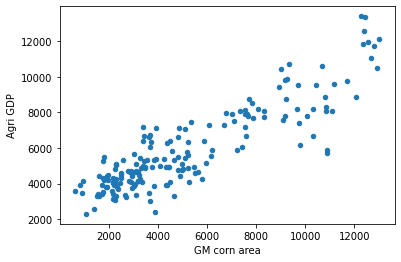

In [78]:
corn_table1.plot.scatter(x='GM corn area', y ='Agri GDP')

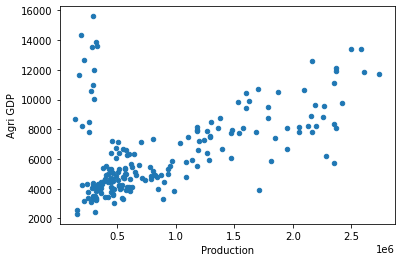

In [79]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Production', y ='Agri GDP')

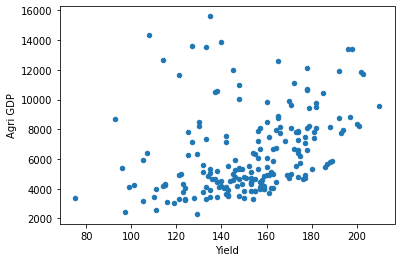

In [80]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Yield', y ='Agri GDP')

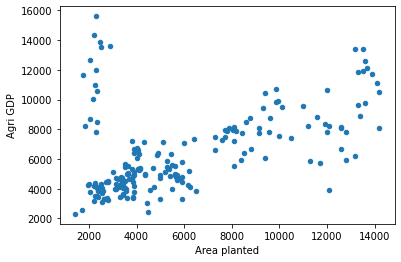

In [81]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Area planted', y ='Agri GDP')

In [82]:
corn_table.dtypes

Year                          int64
State                        object
Area planted                  int64
Area harvested for grain     object
Yield                         int64
Production                    int64
Table                        object
Unit                         object
Variety                      object
Attribute                    object
Value                       float64
GM corn area                float64
Agri GDP                      int64
dtype: object

In [83]:
corn_table["Area harvested for grain"] = corn_table["Area harvested for grain"].astype(float).astype(int)

In [84]:
corn_table["Value"] = corn_table["Value"].astype(float).astype(int)
corn_table["GM corn area"] = corn_table["GM corn area"].astype(float).astype(int)

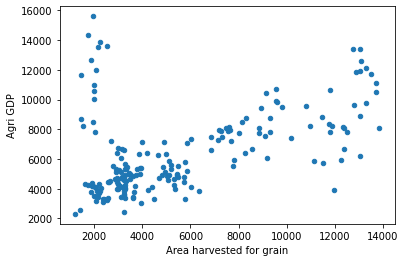

In [85]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Area harvested for grain', y ='Agri GDP')

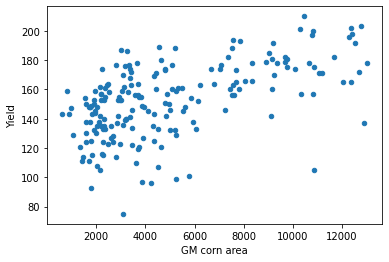

In [86]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='GM corn area', y ='Yield')

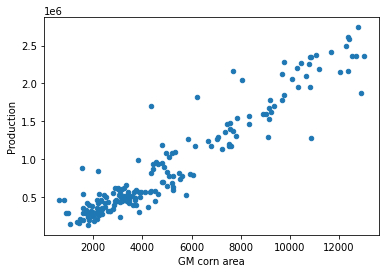

In [87]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='GM corn area', y ='Production')

---

# Corn descriptive statistics

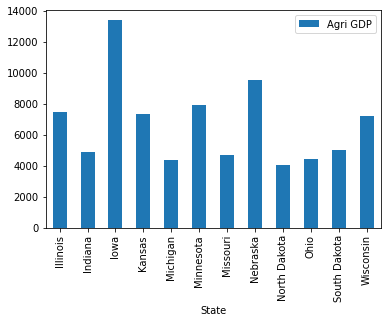

In [88]:
corn_table1[corn_table1['Year']==2019].plot.bar('State','Agri GDP')

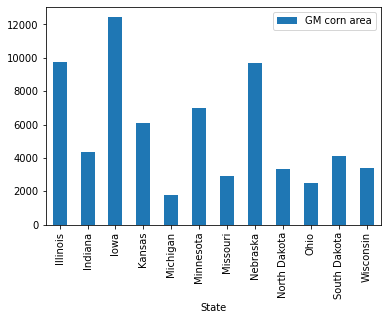

In [89]:
corn_table1[corn_table1['Year']==2019].plot.bar('State','GM corn area')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


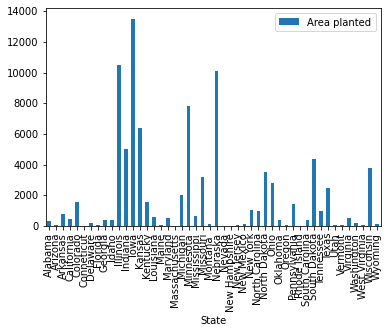

In [90]:
corn[corn['Year']==2019][corn['State']!='United States'].plot.bar('State','Area planted')

In [91]:
gdp_agri.dtypes

Year         int64
State       object
Agri GDP     int64
dtype: object

In [92]:
gdp_agri['Year'].max()

2019

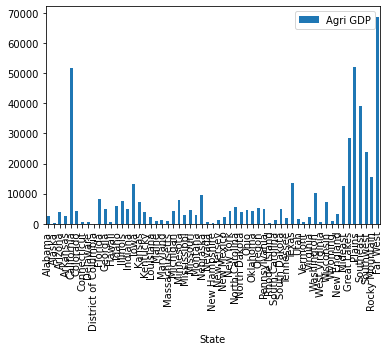

In [93]:
gdp_agri[(gdp_agri['Year']==2019)&(gdp_agri['State']!='United States')].plot.bar('State','Agri GDP')

In [94]:
gdp_agri.groupby(['Year', 'State']).count().sort_values(ascending=False, by ='Agri GDP')

Agri GDP
Year State                
2018 Far West            2
2005 Alabama             1
2015 California          1
2014 Utah                1
     Vermont             1
...                    ...
2010 Arkansas            1
     California          1
     Colorado            1
     Connecticut         1
2019 Wyoming             1

[899 rows x 1 columns]

In [95]:
gdp_agri[(gdp_agri['Year']==2019)&(gdp_agri['State']=='Far West')]

,Year,State,Agri GDP
899,2019,Far West,68707


---

Checking correlation just for 1 year

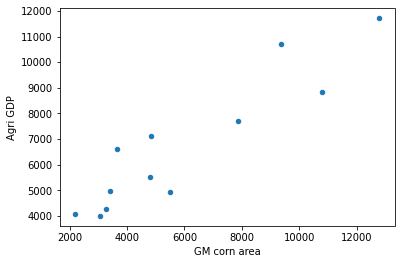

In [96]:
corn_table1[corn_table1['Year']==2016].plot.scatter(x= 'GM corn area', y = 'Agri GDP')

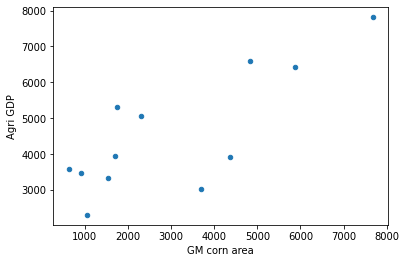

In [97]:
corn_table1[corn_table1['Year']==2005].plot.scatter(x= 'GM corn area', y = 'Agri GDP')

---

Checking for correlations

# Checking for correlations for initial variables

In [98]:
corn_table[corn_table['State']!='United States'].corr()

,Year,Area planted,Area harvested for grain,Yield,Production,Value,GM corn area,Agri GDP
Year,1.000000,0.037916,0.033849,0.339200,0.101815,NaN,0.201898,0.258209
Area planted,0.037916,1.000000,0.998061,0.547011,0.974593,NaN,0.962466,0.489489
Area harvested for grain,0.033849,0.998061,1.000000,0.553025,0.978386,NaN,0.958149,0.484225
Yield,0.339200,0.547011,0.553025,1.000000,0.674699,NaN,0.555540,0.347681
Production,0.101815,0.974593,0.978386,0.674699,1.000000,NaN,0.948528,0.517038
Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM corn area,0.201898,0.962466,0.958149,0.555540,0.948528,NaN,1.000000,0.545486
Agri GDP,0.258209,0.489489,0.484225,0.347681,0.517038,NaN,0.545486,1.000000


In [99]:
import seaborn as sns

In [100]:
corn_for_cor=corn_table1.drop(columns='Year')

In [101]:
corn_for_cor=corn_table1.drop(columns='Value')

In [102]:
corn_for_cor=corn_for_cor.drop(columns='Year')

In [103]:
corn_for_cor.corr()

,Area planted,Yield,Production,GM corn area,Agri GDP
Area planted,1.000000,0.515347,0.972699,0.959574,0.829025
Yield,0.515347,1.000000,0.655348,0.527436,0.634722
Production,0.972699,0.655348,1.000000,0.944657,0.847893
GM corn area,0.959574,0.527436,0.944657,1.000000,0.879661
Agri GDP,0.829025,0.634722,0.847893,0.879661,1.000000


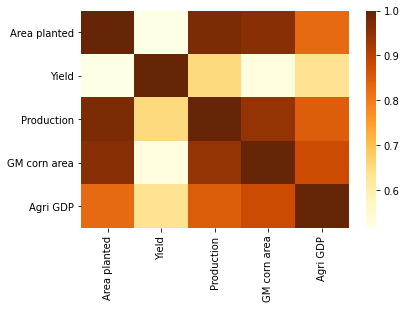

In [104]:
sns.heatmap(corn_for_cor[corn_for_cor['State']!='United States'].corr(), cmap="YlOrBr")

---

# More Descriptive stats

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9682151d68>]],
      dtype=object)

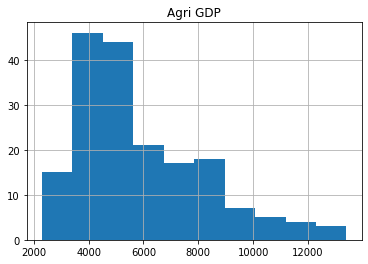

In [105]:
corn_table1.hist(column='Agri GDP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f967f85cc50>]],
      dtype=object)

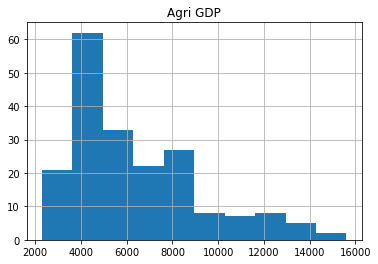

In [106]:
corn_table[corn_table['State']!='United States'].hist(column='Agri GDP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f967f85f400>]],
      dtype=object)

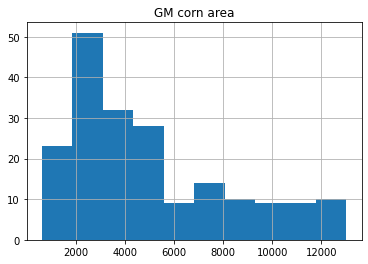

In [107]:
corn_table[corn_table['State']!='United States'].hist(column='GM corn area')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


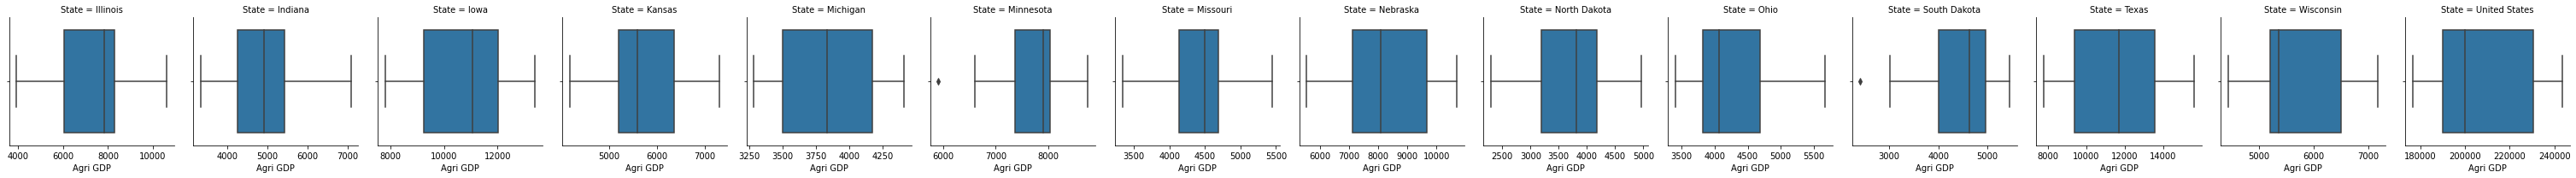

In [108]:
g = sns.FacetGrid(corn_table, col="State", sharex=False)
g.map(sns.boxplot, 'Agri GDP')

---

# Scatter plots for each state

Doing correlations within each state

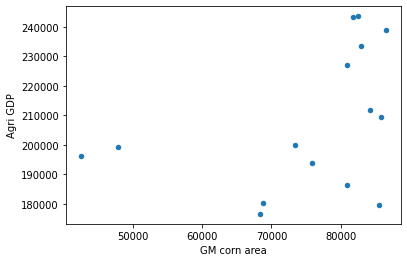

In [109]:
corn_table[corn_table['State']=='United States'].plot.scatter('GM corn area','Agri GDP')

In [110]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Illinois']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.624


In [111]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Indiana']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.614


In [112]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Iowa']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.598


In [113]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Kansas']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.527


In [114]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Michigan']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.610


In [115]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Minnesota']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.634


In [116]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Missouri']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.604


In [117]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Nebraska']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.641


In [118]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='North Dakota']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.603


In [119]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Ohio']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.691


In [120]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='South Dakota']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.590


In [121]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table[corn_table['State']=='Texas']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.614


In [122]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Wisconsin']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.565


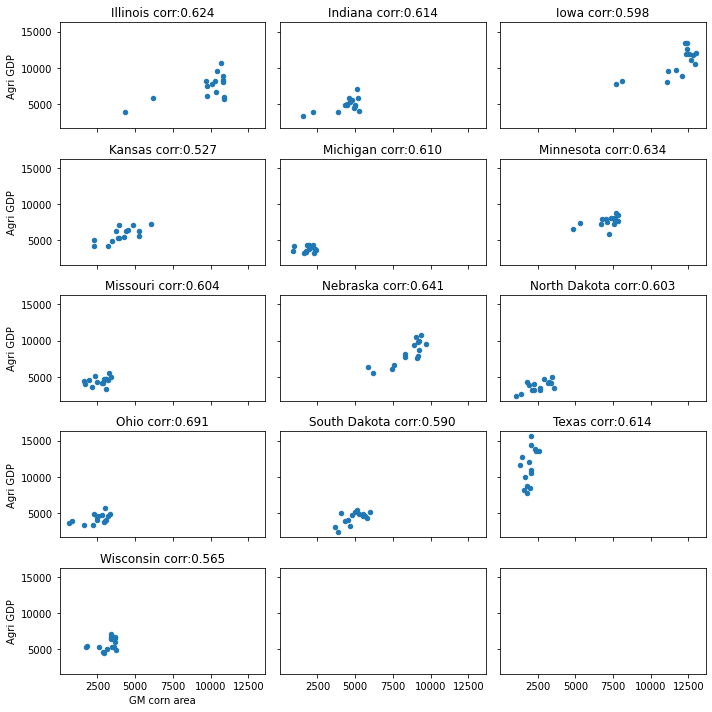

In [123]:
fig, axes = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(10,10))
corn_table[corn_table['State']=='Illinois'].plot.scatter('GM corn area','Agri GDP', ax=axes[0,0])
axes[0,0].set_title('Illinois corr:0.624')
corn_table[corn_table['State']=='Indiana'].plot.scatter('GM corn area','Agri GDP', ax=axes[0,1])
axes[0,1].set_title('Indiana corr:0.614')
corn_table[corn_table['State']=='Iowa'].plot.scatter('GM corn area','Agri GDP', ax=axes[0,2])
axes[0,2].set_title('Iowa corr:0.598')
corn_table[corn_table['State']=='Kansas'].plot.scatter('GM corn area','Agri GDP', ax=axes[1,0])
axes[1,0].set_title('Kansas corr:0.527')
corn_table[corn_table['State']=='Michigan'].plot.scatter('GM corn area','Agri GDP', ax=axes[1,1])
axes[1,1].set_title('Michigan corr:0.610')
corn_table[corn_table['State']=='Minnesota'].plot.scatter('GM corn area','Agri GDP', ax=axes[1,2])
axes[1,2].set_title('Minnesota corr:0.634')
corn_table[corn_table['State']=='Missouri'].plot.scatter('GM corn area','Agri GDP', ax=axes[2,0])
axes[2,0].set_title('Missouri corr:0.604')
corn_table1[corn_table1['State']=='Nebraska'].plot.scatter('GM corn area','Agri GDP', ax=axes[2,1])
axes[2,1].set_title('Nebraska corr:0.641')
corn_table1[corn_table1['State']=='North Dakota'].plot.scatter('GM corn area','Agri GDP', ax=axes[2,2])
axes[2,2].set_title('North Dakota corr:0.603')
corn_table1[corn_table1['State']=='Ohio'].plot.scatter('GM corn area','Agri GDP', ax=axes[3,0])
axes[3,0].set_title('Ohio corr:0.691')
corn_table1[corn_table1['State']=='South Dakota'].plot.scatter('GM corn area','Agri GDP', ax=axes[3,1])
axes[3,1].set_title('South Dakota corr:0.590')
corn_table[corn_table['State']=='Texas'].plot.scatter('GM corn area','Agri GDP', ax=axes[3,2])
axes[3,2].set_title('Texas corr:0.614')
corn_table1[corn_table1['State']=='Wisconsin'].plot.scatter('GM corn area','Agri GDP', ax=axes[4,0])
axes[4,0].set_title('Wisconsin corr:0.565')

plt.tight_layout()
fig.show()

---

# Panel regression or timeseries regression?

In [251]:
nor_corn_table.reset_index(level=0, inplace=True)

In [265]:
nor_corn_table

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,N_Agri_GDP,All crops planted acreage,Agri exports,Corn exports,TOT_EMP,Population,N_TOT_EMP_1000,N_GM_corn_area,N_agri_exports
0,2005,Illinois,12100000,11950000,0.503704,1708850000,4356000,3923000000,0.202081,23111000,3694000000,917000000,80,12609903,0.026109,0.363671,0.298260
1,2005,Indiana,5900000,5770000,0.585185,888580000,1534000,3334000000,0.377478,12330000,1902000000,384000000,50,6278616,0.037479,0.222956,0.273116
2,2005,Iowa,12800000,12500000,0.725926,2162500000,7680000,7813000000,0.437071,24680000,4402000000,920000000,240,2964454,0.549832,0.568116,0.309990
3,2005,Kansas,3650000,3450000,0.444444,465750000,2299000,5063000000,0.117273,22711000,2205000000,194000000,80,2745299,0.186131,0.092316,0.051154
4,2005,Missouri,3100000,2970000,0.266667,329670000,1705000,3948000000,0.176450,13444000,1696000000,170000000,50,5790300,0.042252,0.114129,0.080611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2019,Nebraska,10100000,9810000,0.792593,1785420000,9696000,9526000000,0.351552,19176000,6293000000,958000000,190,1934408,0.670971,0.495324,0.307427
147,2019,North Dakota,3500000,3230000,0.488889,455430000,3360000,4069000000,0.108731,23221000,4088000000,209000000,60,762062,0.534180,0.180896,0.208278
148,2019,Ohio,2800000,2570000,0.659259,421480000,2492000,4458000000,0.610043,8595000,3509000000,300000000,100,11689100,0.041620,0.416482,0.630811
149,2019,Texas,2500000,2150000,0.429630,285950000,2375000,13521000000,0.116216,21419000,6300000000,166000000,470,28995881,0.095382,0.020054,0.059513


In [259]:
data = nor_corn_table

In [262]:
data.head()

,,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,N_Agri_GDP,All crops planted acreage,Agri exports,Corn exports,TOT_EMP,Population,N_TOT_EMP_1000,N_GM_corn_area,N_agri_exports,Year
State_x,Year,,,,,,,,,,,,,,,,
Illinois,2005,12100000,11950000,0.503704,1708850000,4356000,3923000000,0.202081,23111000,3694000000,917000000,80,12609903,0.026109,0.363671,0.298260,2005
Indiana,2005,5900000,5770000,0.585185,888580000,1534000,3334000000,0.377478,12330000,1902000000,384000000,50,6278616,0.037479,0.222956,0.273116,2005
Iowa,2005,12800000,12500000,0.725926,2162500000,7680000,7813000000,0.437071,24680000,4402000000,920000000,240,2964454,0.549832,0.568116,0.309990,2005
Kansas,2005,3650000,3450000,0.444444,465750000,2299000,5063000000,0.117273,22711000,2205000000,194000000,80,2745299,0.186131,0.092316,0.051154,2005
Missouri,2005,3100000,2970000,0.266667,329670000,1705000,3948000000,0.176450,13444000,1696000000,170000000,50,5790300,0.042252,0.114129,0.080611,2005


data.head()
data.drop(columns=['Acres operated in agriculture','JOBS_1000', 'log_TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN', 'OCC_TITLE', 'ST', 'N_corn_exports'] , inplace=True)

In [261]:
Year = pd.Categorical(data.Year)
data = data.set_index(["State_x", "Year"])
data["Year"] = Year
print(nor_corn_table.describe)
print(data.head())

<bound method NDFrame.describe of      Year       State_x  ...  N_GM_corn_area  N_agri_exports
0    2005      Illinois  ...        0.363671        0.298260
1    2005       Indiana  ...        0.222956        0.273116
2    2005          Iowa  ...        0.568116        0.309990
3    2005        Kansas  ...        0.092316        0.051154
4    2005      Missouri  ...        0.114129        0.080611
..    ...           ...  ...             ...             ...
146  2019      Nebraska  ...        0.495324        0.307427
147  2019  North Dakota  ...        0.180896        0.208278
148  2019          Ohio  ...        0.416482        0.630811
149  2019         Texas  ...        0.020054        0.059513
150  2019     Wisconsin  ...        0.544856        0.467983

[151 rows x 17 columns]>
               Area planted  Area harvested for grain  ...  N_agri_exports  Year
State_x  Year                                          ...                      
Illinois 2005      12100000                  1

In [264]:
!pip install linearmodels
from linearmodels import PanelOLS
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

exog_vars = ["N_GM_corn_area","Yield","N_TOT_EMP_1000"]
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.N_Agri_GDP, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:             N_Agri_GDP   R-squared:                        0.5961
Estimator:                  PooledOLS   R-squared (Between):              0.7134
No. Observations:                 151   R-squared (Within):               0.4221
Date:                Tue, Dec 22 2020   R-squared (Overall):              0.5961
Time:                        10:57:31   Log-likelihood                    56.686
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      72.307
Entities:                          13   P-value                           0.0000
Avg Obs:                       11.615   Distribution:                   F(3,147)
Min Obs:                       2.0000                                           
Max Obs:                       15.000   F-statistic (robust):             72.307
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


In [267]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(data.N_Agri_GDP, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:             N_Agri_GDP   R-squared:                        0.5261
Estimator:              RandomEffects   R-squared (Between):              0.5721
No. Observations:                 151   R-squared (Within):               0.5337
Date:                Tue, Dec 22 2020   R-squared (Overall):              0.5081
Time:                        11:01:37   Log-likelihood                    183.16
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      54.392
Entities:                          13   P-value                           0.0000
Avg Obs:                       11.615   Distribution:                   F(3,147)
Min Obs:                       2.0000                                           
Max Obs:                       15.000   F-statistic (robust):             56.873
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


In [268]:
re_res.variance_decomposition

Effects                   0.026942
Residual                  0.005226
Percent due to Effects    0.837541
Name: Variance Decomposition, dtype: float64

In [269]:
re_res.theta.head()

,theta
State_x,
Illinois,0.887012
Indiana,0.878750
Iowa,0.887012
Kansas,0.835796
Missouri,0.887012


In [270]:
from linearmodels.panel import BetweenOLS
exog_vars = ["N_GM_corn_area","Yield","N_TOT_EMP_1000"]
exog = sm.add_constant(data[exog_vars])
mod = BetweenOLS(data.N_Agri_GDP, exog)
be_res = mod.fit()
print(be_res)

                         BetweenOLS Estimation Summary                          
Dep. Variable:             N_Agri_GDP   R-squared:                        0.7182
Estimator:                 BetweenOLS   R-squared (Between):              0.7182
No. Observations:                  13   R-squared (Within):               0.2342
Date:                Tue, Dec 22 2020   R-squared (Overall):              0.5763
Time:                        11:09:05   Log-likelihood                    7.2854
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      7.6474
Entities:                          13   P-value                           0.0076
Avg Obs:                       11.615   Distribution:                     F(3,9)
Min Obs:                       2.0000                                           
Max Obs:                       15.000   F-statistic (robust):             7.6474
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


In [271]:
from linearmodels.panel import PanelOLS
exog_vars = ["N_GM_corn_area","Yield","N_TOT_EMP_1000", "Year"]
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.N_Agri_GDP, exog, entity_effects=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             N_Agri_GDP   R-squared:                        0.6606
Estimator:                   PanelOLS   R-squared (Between):              0.5472
No. Observations:                 151   R-squared (Within):               0.6606
Date:                Tue, Dec 22 2020   R-squared (Overall):              0.5242
Time:                        11:10:46   Log-likelihood                    214.39
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      13.855
Entities:                          13   P-value                           0.0000
Avg Obs:                       11.615   Distribution:                  F(17,121)
Min Obs:                       2.0000                                           
Max Obs:                       15.000   F-statistic (robust):             13.855
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


In [272]:
from linearmodels.panel import PanelOLS
exog_vars = ["N_GM_corn_area","Yield","N_TOT_EMP_1000"]
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.N_Agri_GDP, exog, entity_effects=True, time_effects=True)
fe_te_res = mod.fit()
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             N_Agri_GDP   R-squared:                        0.2850
Estimator:                   PanelOLS   R-squared (Between):              0.5397
No. Observations:                 151   R-squared (Within):               0.5312
Date:                Tue, Dec 22 2020   R-squared (Overall):              0.5053
Time:                        11:13:05   Log-likelihood                    214.39
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.077
Entities:                          13   P-value                           0.0000
Avg Obs:                       11.615   Distribution:                   F(3,121)
Min Obs:                       2.0000                                           
Max Obs:                       15.000   F-statistic (robust):             16.077
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


---

# Normalising Agriculture GDP and repeating the analysis

Normalising the GDP, first add and clean the acreage operated per state to the Agriculture GDP dataframe and then divide the Agri GDP by that acreage to have the normalised_gdp_agri

In [130]:
acres_operated.head()

,Year,Period,State,Data Item,Value,Unnamed: 5,Unnamed: 6
0,2019,YEAR,Alabama,FARM OPERATIONS - ACRES OPERATED,8300000,NaN,NaN
1,2019,YEAR,Alaska,FARM OPERATIONS - ACRES OPERATED,850000,NaN,NaN
2,2019,YEAR,Arizona,FARM OPERATIONS - ACRES OPERATED,26200000,NaN,NaN
3,2019,YEAR,Arkansas,FARM OPERATIONS - ACRES OPERATED,14000000,NaN,NaN
4,2019,YEAR,California,FARM OPERATIONS - ACRES OPERATED,24300000,NaN,NaN


In [131]:
acres_operated =acres_operated.drop(columns="Unnamed: 5")

In [132]:
acres_operated =acres_operated.drop(columns="Unnamed: 6")

In [133]:
acres_operated.dtypes

Year          int64
Period       object
State        object
Data Item    object
Value         int64
dtype: object

In [134]:
gdp_agri.head()

,Year,State,Agri GDP
0,2005,United States,196126
1,2005,Alabama,3837
2,2005,Alaska,417
3,2005,Arizona,3019
4,2005,Arkansas,4282


In [135]:
acres_operated = acres_operated.drop(columns="Period")
acres_operated = acres_operated.drop(columns="Data Item")


In [136]:
nor_gdp_agri = gdp_agri.merge(acres_operated, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [137]:
norm_data_all_states = data_all_states.merge(acres_operated, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [138]:
norm_data_all_states.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Value
0,2005,Alabama,220000,200000,119,23800000,96800,3837000000,8800000
1,2005,Arizona,50000,22000,195,4290000,22000,3019000000,26250000
2,2005,Arkansas,240000,230000,131,30130000,105600,4282000000,14200000
3,2005,California,560000,130000,172,22360000,246400,37673000000,25900000
4,2005,Colorado,1100000,950000,148,140600000,484000,3253000000,31100000


In [139]:
norm_data_all_states["Normalised Agri GDP"] = norm_data_all_states["Agri GDP"] / norm_data_all_states["Value"]
norm_data_all_states["N_Area_planted"] = norm_data_all_states["Area planted"] / norm_data_all_states["Value"]
norm_data_all_states["N_Area_harvested"] = norm_data_all_states["Area harvested for grain"] / norm_data_all_states["Value"]
norm_data_all_states["N_Production"] = norm_data_all_states["Production"] / norm_data_all_states["Value"]
norm_data_all_states["N_GM_corn_area"] = norm_data_all_states["GM corn area"] / norm_data_all_states["Value"]

Add new column with the normalised GDP

In [140]:
nor_gdp_agri["Normalised Agri GDP"] = nor_gdp_agri["Agri GDP"] / nor_gdp_agri["Value"]

In [141]:
nor_gdp_agri

,Year,State,Agri GDP,Value,Normalised Agri GDP
0,2005,Alabama,3837,8800000,0.000436
1,2005,Alaska,417,900000,0.000463
2,2005,Arizona,3019,26250000,0.000115
3,2005,Arkansas,4282,14200000,0.000302
4,2005,California,37673,25900000,0.001455
...,...,...,...,...,...
745,2019,Virginia,2266,7800000,0.000291
746,2019,Washington,10099,14600000,0.000692
747,2019,West Virginia,448,3500000,0.000128
748,2019,Wisconsin,7182,14300000,0.000502


In [142]:
nor_gdp_agri=nor_gdp_agri.drop(columns='Agri GDP')
nor_gdp_agri=nor_gdp_agri.drop(columns='Value')

In [143]:
corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value,GM corn area,Agri GDP
0,2005,Illinois,12100,11950,143,1708850,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Illinois,0,4356,3923
1,2005,Indiana,5900,5770,154,888580,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Indiana,0,1534,3334
2,2005,Iowa,12800,12500,173,2162500,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Iowa,0,7680,7813
3,2005,Kansas,3650,3450,135,465750,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Kansas,0,2299,5063
4,2005,Michigan,2250,2010,143,287430,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Michigan,0,900,3481


In [144]:
nor_corn_table = corn_table.merge(nor_gdp_agri, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [145]:
nor_corn_table=nor_corn_table.drop(['Table','Variety','Unit','Value'], axis=1)

In [146]:
nor_corn_table[nor_corn_table['Normalised Agri GDP']>0.0003]

,Year,State,Area planted,Area harvested for grain,Yield,Production,Attribute,GM corn area,Agri GDP,Normalised Agri GDP
4,2005,Michigan,2250,2010,143,287430,Michigan,900,3481,0.000345
12,2005,Wisconsin,3800,2900,148,429200,Wisconsin,1748,5300,0.000344
17,2006,Michigan,2200,1960,147,288120,Michigan,968,4161,0.000412
25,2006,Wisconsin,3650,2800,143,400400,Wisconsin,1825,5501,0.000360
30,2007,Michigan,2650,2350,124,291400,Michigan,1590,3307,0.000331
...,...,...,...,...,...,...,...,...,...,...
184,2019,Iowa,13500,13050,198,2583900,Iowa,12420,13370,0.000437
186,2019,Michigan,2000,1610,149,239890,Michigan,1780,4343,0.000443
187,2019,Minnesota,7800,7260,174,1263240,Minnesota,7020,7913,0.000310
191,2019,Ohio,2800,2570,164,421480,Ohio,2492,4458,0.000328


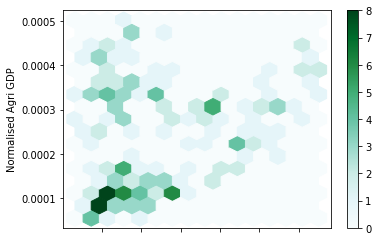

In [147]:
nor_corn_table.plot.hexbin(y='Normalised Agri GDP', x='GM corn area', gridsize=15)

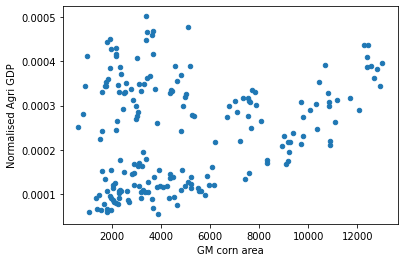

In [148]:
nor_corn_table.plot.scatter(y='Normalised Agri GDP', x='GM corn area' )


In [149]:
nor_corn_table['State'].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin'], dtype=object)

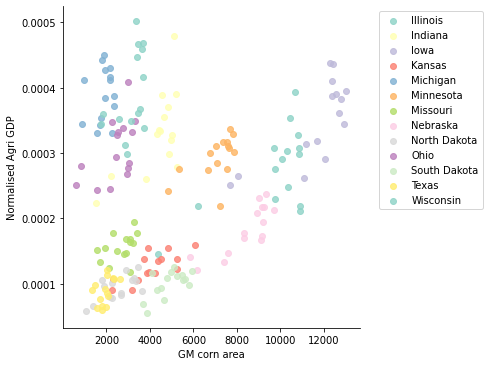

In [150]:
# library & dataset
import seaborn as sns

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="GM corn area", y="Normalised Agri GDP", data=nor_corn_table, fit_reg=False, hue='State', legend=False, palette=sns.color_palette("Set3", 13))
 
# Move the legend to an empty part of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
 
#sns.plt.show()


# Adding other variables to perform the regression

Then, I will add some other variables that may affect the Agricultural GDP other than GM crop production, and use them as control variables

Checking the correlation between Field crop totals and the agricultural GDP, to see whether the crops levels overall create the same linear relationship

In [151]:
crops_planted_acreage.rename({'Value':'All crops planted acreage'}, inplace=True)

In [152]:
crops_planted_acreage.head()

,Year,Period,State,Data Item,Value
0,2019,YEAR,Alabama,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",2115000
1,2019,YEAR,Alaska,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",28000
2,2019,YEAR,Arizona,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",634000
3,2019,YEAR,Arkansas,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",6598000
4,2019,YEAR,California,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",2939000


In [153]:
nor_corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Attribute,GM corn area,Agri GDP,Normalised Agri GDP
0,2005,Illinois,12100,11950,143,1708850,Illinois,4356,3923,0.000145
1,2005,Indiana,5900,5770,154,888580,Indiana,1534,3334,0.000224
2,2005,Iowa,12800,12500,173,2162500,Iowa,7680,7813,0.000250
3,2005,Kansas,3650,3450,135,465750,Kansas,2299,5063,0.000107
4,2005,Michigan,2250,2010,143,287430,Michigan,900,3481,0.000345


In [154]:
jobs_and_wage.head()

,Year,ST,STATE,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000
0,2005,AL,Alabama,"Farm, ranch, and other agricultural managers",50,24,49100,23,46990,NaN
1,2005,AL,Alabama,"Agricultural workers, all other",110,12,25910,10,21060,NaN
2,2005,AZ,Arizona,"Agricultural workers, all other",**,12,25340,11,23000,NaN
3,2005,AR,Arkansas,"Farm, ranch, and other agricultural managers",50,25,52940,24,50800,NaN
4,2005,AR,Arkansas,"Agricultural workers, all other",250,8,17360,8,16350,NaN


In [155]:
jobs_and_wage.dtypes

Year          int64
ST           object
STATE        object
OCC_TITLE    object
TOT_EMP      object
H_MEAN       object
A_MEAN       object
H_MEDIAN     object
A_MEDIAN     object
JOBS_1000    object
dtype: object

In [156]:
jobs_and_wage.replace({"**": "0"}, inplace=True)

In [157]:
jobs_and_wage.replace({"NaN": "0"}, inplace=True)

In [158]:
jobs_and_wage.replace({"*": "0"}, inplace=True)

In [159]:
jobs_and_wage["TOT_EMP"] = jobs_and_wage["TOT_EMP"].astype(float).astype(int)
jobs_and_wage["H_MEAN"] = jobs_and_wage["H_MEAN"].astype(float).astype(int)
jobs_and_wage["A_MEAN"] = jobs_and_wage["A_MEAN"].astype(float).astype(int)
jobs_and_wage["H_MEDIAN"] = jobs_and_wage["H_MEDIAN"].astype(float).astype(int)
jobs_and_wage["A_MEDIAN"] = jobs_and_wage["A_MEDIAN"].astype(float).astype(int)

In [160]:
jobs_and_wage.dtypes

Year          int64
ST           object
STATE        object
OCC_TITLE    object
TOT_EMP       int64
H_MEAN        int64
A_MEAN        int64
H_MEDIAN      int64
A_MEDIAN      int64
JOBS_1000    object
dtype: object

In [161]:
jobs_and_wage=jobs_and_wage.merge(population, how='inner', left_on=['Year', 'STATE'], right_on=['Year', 'State'])

In [162]:
jobs_and_wage.head()

,Year,ST,STATE,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,State,Population
0,2005,AL,Alabama,"Farm, ranch, and other agricultural managers",50,24,49100,23,46990,NaN,Alabama,4569805
1,2005,AL,Alabama,"Agricultural workers, all other",110,12,25910,10,21060,NaN,Alabama,4569805
2,2005,AZ,Arizona,"Agricultural workers, all other",0,12,25340,11,23000,NaN,Arizona,5839077
3,2005,AR,Arkansas,"Farm, ranch, and other agricultural managers",50,25,52940,24,50800,NaN,Arkansas,2781097
4,2005,AR,Arkansas,"Agricultural workers, all other",250,8,17360,8,16350,NaN,Arkansas,2781097


In [163]:
exports.columns

Index(['Year', 'States', 'Agri exports ', 'Corn exports'], dtype='object')

In [164]:
exports.dtypes

Year               int64
States            object
Agri exports     float64
Corn exports     float64
dtype: object

In [165]:
exports["Agri exports "] = exports["Agri exports "].astype(float).astype(int)
exports["Corn exports"] = exports["Corn exports"].astype(float).astype(int)

TABLE WITH AGRI GDP; EXPORTS; JOBS; WAGES; TOTAL CROP ACREAGE

In [166]:
gdp_agri.head()

,Year,State,Agri GDP
0,2005,United States,196126
1,2005,Alabama,3837
2,2005,Alaska,417
3,2005,Arizona,3019
4,2005,Arkansas,4282


In [167]:
all_states = gdp_agri.merge(exports, how='inner', left_on=['Year', 'State'], right_on=['Year', 'States'])

In [168]:
all_states = all_states.merge(jobs_and_wage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'STATE'])

In [169]:
all_states = all_states.merge(crops_planted_acreage, how='inner', left_on=['Year', 'STATE'], right_on=['Year', 'State'])

In [170]:
all_states = all_states.merge(acres_operated, how='inner', left_on=['Year', 'STATE'], right_on=['Year', 'State'])

In [171]:
all_states.head()

,Year,State_x,Agri GDP,States,Agri exports,Corn exports,ST,STATE,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,State_y,Population,Period,State_x,Data Item,Value_x,State_y,Value_y
0,2005,Alabama,3837,Alabama,774,9,AL,Alabama,"Farm, ranch, and other agricultural managers",50,24,49100,23,46990,NaN,Alabama,4569805,YEAR,Alabama,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",2037000,Alabama,8800000
1,2005,Alabama,3837,Alabama,774,9,AL,Alabama,"Agricultural workers, all other",110,12,25910,10,21060,NaN,Alabama,4569805,YEAR,Alabama,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",2037000,Alabama,8800000
2,2005,Arizona,3019,Arizona,663,1,AZ,Arizona,"Agricultural workers, all other",0,12,25340,11,23000,NaN,Arizona,5839077,YEAR,Arizona,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",730000,Arizona,26250000
3,2005,Arkansas,4282,Arkansas,1939,17,AR,Arkansas,"Farm, ranch, and other agricultural managers",50,25,52940,24,50800,NaN,Arkansas,2781097,YEAR,Arkansas,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",7559000,Arkansas,14200000
4,2005,Arkansas,4282,Arkansas,1939,17,AR,Arkansas,"Agricultural workers, all other",250,8,17360,8,16350,NaN,Arkansas,2781097,YEAR,Arkansas,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",7559000,Arkansas,14200000


TABLE WITH CORN; GM CORN; AGRI GDP; EXPORTS; JOBS; WAGES; TOTAL CROP ACREAGE

In [172]:
nor_corn_table = nor_corn_table.merge(crops_planted_acreage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [173]:
nor_corn_table = nor_corn_table.merge(exports, how='inner', left_on=['Year', 'State'], right_on=['Year', 'States'])

In [174]:
nor_corn_table = nor_corn_table.merge(jobs_and_wage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'STATE'])

In [175]:
norm_data_all_states = norm_data_all_states.merge(exports, how='inner', left_on=['Year', 'State'], right_on=['Year', 'States'])
norm_data_all_states = norm_data_all_states.merge(jobs_and_wage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'STATE'])

In [176]:
norm_data_all_states.head()

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Value,Normalised Agri GDP,N_Area_planted,N_Area_harvested,N_Production,N_GM_corn_area,States,Agri exports,Corn exports,ST,STATE,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,State_y,Population
0,2005,Alabama,220000,200000,119,23800000,96800,3837000000,8800000,436.022727,0.025000,0.022727,2.704545,0.011000,Alabama,774,9,AL,Alabama,"Farm, ranch, and other agricultural managers",50,24,49100,23,46990,NaN,Alabama,4569805
1,2005,Alabama,220000,200000,119,23800000,96800,3837000000,8800000,436.022727,0.025000,0.022727,2.704545,0.011000,Alabama,774,9,AL,Alabama,"Agricultural workers, all other",110,12,25910,10,21060,NaN,Alabama,4569805
2,2005,Arizona,50000,22000,195,4290000,22000,3019000000,26250000,115.009524,0.001905,0.000838,0.163429,0.000838,Arizona,663,1,AZ,Arizona,"Agricultural workers, all other",0,12,25340,11,23000,NaN,Arizona,5839077
3,2005,Arkansas,240000,230000,131,30130000,105600,4282000000,14200000,301.549296,0.016901,0.016197,2.121831,0.007437,Arkansas,1939,17,AR,Arkansas,"Farm, ranch, and other agricultural managers",50,25,52940,24,50800,NaN,Arkansas,2781097
4,2005,Arkansas,240000,230000,131,30130000,105600,4282000000,14200000,301.549296,0.016901,0.016197,2.121831,0.007437,Arkansas,1939,17,AR,Arkansas,"Agricultural workers, all other",250,8,17360,8,16350,NaN,Arkansas,2781097


In [177]:
nor_corn_table.drop(columns=['Attribute', 'States', 'Period', 'Data Item', 'STATE', 'State_y'], inplace=True)

In [178]:
norm_data_all_states.drop(columns=[ 'States', 'JOBS_1000', 'STATE', 'State_y'], inplace=True)

In [179]:
norm_data_all_states.rename({'Value':'All crops planted acreage'}, inplace=True, axis=1)

In [180]:
nor_corn_table.rename({'Value':'All crops planted acreage'}, inplace=True, axis=1)

In [181]:
norm_data_all_states['OCC_TITLE'].replace({"Farmers, Ranchers, and Other Agricultural Managers": "Farm, ranch, and other agricultural managers"}, inplace=True)

In [182]:
norm_data_all_states['Agri exports '] = norm_data_all_states['Agri exports ']*1000000
norm_data_all_states['Corn exports'] = norm_data_all_states['Corn exports']*1000000

In [183]:
nor_corn_table['OCC_TITLE'].replace({"Farmers, Ranchers, and Other Agricultural Managers": "Farm, ranch, and other agricultural managers"}, inplace=True)

In [184]:
norm_data_all_states['OCC_TITLE'].replace({'Agricultural Workers, All Other':'Agricultural workers, all other'}, inplace=True)

In [185]:
nor_corn_table['Agri GDP'] = nor_corn_table['Agri GDP']*1000000
nor_corn_table['Normalised Agri GDP'] = nor_corn_table['Normalised Agri GDP']*1000000
nor_corn_table['Area planted'] = nor_corn_table['Area planted']*1000
nor_corn_table['Area harvested for grain'] = nor_corn_table['Area harvested for grain']*1000

In [186]:
nor_corn_table['GM corn area'] = nor_corn_table['GM corn area']*1000

In [187]:
nor_corn_table['Agri exports '] = nor_corn_table['Agri exports ']*1000000
nor_corn_table['Corn exports'] = nor_corn_table['Corn exports']*1000000

In [188]:
nor_corn_table['Production'] = nor_corn_table['Production']*1000

In [189]:
nor_corn_table['Normalised Agri GDP'].round(2)

0      145.30
1      145.30
2      223.76
3      223.76
4      250.42
        ...  
277    103.54
278    327.79
279    106.89
280    106.89
281    502.24
Name: Normalised Agri GDP, Length: 282, dtype: float64

In [190]:
norm_data_all_states

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,All crops planted acreage,Normalised Agri GDP,N_Area_planted,N_Area_harvested,N_Production,N_GM_corn_area,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,Population
0,2005,Alabama,220000,200000,119,23800000,96800,3837000000,8800000,436.022727,0.025000,0.022727,2.704545,0.011000,774000000,9000000,AL,"Farm, ranch, and other agricultural managers",50,24,49100,23,46990,4569805
1,2005,Alabama,220000,200000,119,23800000,96800,3837000000,8800000,436.022727,0.025000,0.022727,2.704545,0.011000,774000000,9000000,AL,"Agricultural workers, all other",110,12,25910,10,21060,4569805
2,2005,Arizona,50000,22000,195,4290000,22000,3019000000,26250000,115.009524,0.001905,0.000838,0.163429,0.000838,663000000,1000000,AZ,"Agricultural workers, all other",0,12,25340,11,23000,5839077
3,2005,Arkansas,240000,230000,131,30130000,105600,4282000000,14200000,301.549296,0.016901,0.016197,2.121831,0.007437,1939000000,17000000,AR,"Farm, ranch, and other agricultural managers",50,25,52940,24,50800,2781097
4,2005,Arkansas,240000,230000,131,30130000,105600,4282000000,14200000,301.549296,0.016901,0.016197,2.121831,0.007437,1939000000,17000000,AR,"Agricultural workers, all other",250,8,17360,8,16350,2781097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2019,Texas,2500000,2150000,133,285950000,2375000,13521000000,126500000,106.885375,0.019763,0.016996,2.260474,0.018775,6300000000,166000000,TX,"Farm, ranch, and other agricultural managers",470,35,71830,32,66110,28995881
868,2019,Texas,2500000,2150000,133,285950000,2375000,13521000000,126500000,106.885375,0.019763,0.016996,2.260474,0.018775,6300000000,166000000,TX,"Agricultural workers, all other",980,13,26050,12,24870,28995881
869,2019,Washington,170000,90000,237,21330000,154700,10099000000,14600000,691.712329,0.011644,0.006164,1.460959,0.010596,3601000000,12000000,WA,"Farm, ranch, and other agricultural managers",130,42,86850,38,79840,7614893
870,2019,Washington,170000,90000,237,21330000,154700,10099000000,14600000,691.712329,0.011644,0.006164,1.460959,0.010596,3601000000,12000000,WA,"Agricultural workers, all other",560,16,33340,14,29720,7614893


In [191]:
len(nor_corn_table[(nor_corn_table['TOT_EMP']==0) & (nor_corn_table['OCC_TITLE']=='Agricultural workers, all other')])

12

In [192]:
nor_corn_table = nor_corn_table[nor_corn_table['OCC_TITLE']=='Farm, ranch, and other agricultural managers']

In [193]:
norm_data_all_states = norm_data_all_states[norm_data_all_states['OCC_TITLE']=='Agricultural workers, all other']

In [194]:
norm_data_all_states.head()

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,All crops planted acreage,Normalised Agri GDP,N_Area_planted,N_Area_harvested,N_Production,N_GM_corn_area,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,Population
1,2005,Alabama,220000,200000,119,23800000,96800,3837000000,8800000,436.022727,0.025000,0.022727,2.704545,0.011000,774000000,9000000,AL,"Agricultural workers, all other",110,12,25910,10,21060,4569805
2,2005,Arizona,50000,22000,195,4290000,22000,3019000000,26250000,115.009524,0.001905,0.000838,0.163429,0.000838,663000000,1000000,AZ,"Agricultural workers, all other",0,12,25340,11,23000,5839077
4,2005,Arkansas,240000,230000,131,30130000,105600,4282000000,14200000,301.549296,0.016901,0.016197,2.121831,0.007437,1939000000,17000000,AR,"Agricultural workers, all other",250,8,17360,8,16350,2781097
6,2005,California,560000,130000,172,22360000,246400,37673000000,25900000,1454.555985,0.021622,0.005019,0.863320,0.009514,9683000000,10000000,CA,"Agricultural workers, all other",2250,12,24640,12,24030,35827943
8,2005,Colorado,1100000,950000,148,140600000,484000,3253000000,31100000,104.598071,0.035370,0.030547,4.520900,0.015563,831000000,72000000,CO,"Agricultural workers, all other",100,11,22320,9,19140,4631888


Changing missing values (0) in employment and wage to the mean so we can do the regression

In [195]:
mean_tot_emp = nor_corn_table[nor_corn_table['TOT_EMP']>0]['TOT_EMP'].median()

nor_corn_table['TOT_EMP'][nor_corn_table['TOT_EMP']==0] = mean_tot_emp

In [196]:
mean_tot_emp1 = norm_data_all_states[norm_data_all_states['TOT_EMP']>0]['TOT_EMP'].median()

norm_data_all_states['TOT_EMP'][norm_data_all_states['TOT_EMP']==0] = mean_tot_emp1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [197]:
mean_tot_emp = nor_corn_table[nor_corn_table['TOT_EMP']>0]['TOT_EMP'].median()

nor_corn_table['TOT_EMP'][nor_corn_table['TOT_EMP']==0] = mean_tot_emp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [198]:
mean_hour_wage = nor_corn_table[nor_corn_table['H_MEAN']>0]['H_MEAN'].mean()

nor_corn_table['H_MEAN'][nor_corn_table['H_MEAN']==0] = mean_hour_wage

In [199]:
mean_ann_wage = nor_corn_table[nor_corn_table['A_MEAN']>0]['A_MEAN'].mean()

nor_corn_table['A_MEAN'][nor_corn_table['A_MEAN']==0] = mean_ann_wage

In [200]:
mean_med_h_wage = nor_corn_table[nor_corn_table['H_MEDIAN']>0]['H_MEDIAN'].mean()

nor_corn_table['H_MEDIAN'][nor_corn_table['H_MEDIAN']==0] = mean_med_h_wage

In [201]:
mean_med_a_wage = nor_corn_table[nor_corn_table['A_MEDIAN']>0]['A_MEDIAN'].mean()

nor_corn_table['A_MEDIAN'][nor_corn_table['A_MEDIAN']==0] = mean_med_a_wage

In [202]:
nor_corn_table = nor_corn_table.round(5)

Making sure all categorical values are the same

In [203]:
norm_data_all_states

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,All crops planted acreage,Normalised Agri GDP,N_Area_planted,N_Area_harvested,N_Production,N_GM_corn_area,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,Population
1,2005,Alabama,220000,200000,119,23800000,96800,3837000000,8800000,436.022727,0.025000,0.022727,2.704545,0.011000,774000000,9000000,AL,"Agricultural workers, all other",110,12,25910,10,21060,4569805
2,2005,Arizona,50000,22000,195,4290000,22000,3019000000,26250000,115.009524,0.001905,0.000838,0.163429,0.000838,663000000,1000000,AZ,"Agricultural workers, all other",120,12,25340,11,23000,5839077
4,2005,Arkansas,240000,230000,131,30130000,105600,4282000000,14200000,301.549296,0.016901,0.016197,2.121831,0.007437,1939000000,17000000,AR,"Agricultural workers, all other",250,8,17360,8,16350,2781097
6,2005,California,560000,130000,172,22360000,246400,37673000000,25900000,1454.555985,0.021622,0.005019,0.863320,0.009514,9683000000,10000000,CA,"Agricultural workers, all other",2250,12,24640,12,24030,35827943
8,2005,Colorado,1100000,950000,148,140600000,484000,3253000000,31100000,104.598071,0.035370,0.030547,4.520900,0.015563,831000000,72000000,CO,"Agricultural workers, all other",100,11,22320,9,19140,4631888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2019,Oregon,80000,48000,237,11376000,72800,5381000000,15800000,340.569620,0.005063,0.003038,0.720000,0.004608,2105000000,5000000,OR,"Agricultural workers, all other",40,16,33150,15,30350,4217737
864,2019,Pennsylvania,1450000,1060000,153,162180000,1319500,4893000000,7300000,670.273973,0.198630,0.145205,22.216438,0.180753,2024000000,80000000,SC,"Agricultural workers, all other",40,22,44850,22,45910,12801989
866,2019,Tennessee,970000,910000,177,161070000,882700,1918000000,10800000,177.592593,0.089815,0.084259,14.913889,0.081731,1510000000,76000000,TN,"Agricultural workers, all other",240,14,29900,13,27100,6829174
868,2019,Texas,2500000,2150000,133,285950000,2375000,13521000000,126500000,106.885375,0.019763,0.016996,2.260474,0.018775,6300000000,166000000,TX,"Agricultural workers, all other",980,13,26050,12,24870,28995881


In [204]:
norm_data_all_states.rename({'All crops planted acreage':'Acres operated in agriculture'}, inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [205]:
norm_data_all_states['N_TOT_EMP_1000'] = norm_data_all_states['TOT_EMP'] / norm_data_all_states['Population']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [206]:
norm_data_all_states['N_TOT_EMP_1000'] = norm_data_all_states['N_TOT_EMP_1000'] * 1000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [207]:
nor_corn_table['N_TOT_EMP_1000'] = nor_corn_table['TOT_EMP'] / nor_corn_table['Population']

In [208]:
nor_corn_table['N_TOT_EMP_1000'] = nor_corn_table['N_TOT_EMP_1000'] * 1000

In [209]:
nor_corn_table=nor_corn_table.merge(acres_operated, left_on=['Year', 'State_x'], right_on=['Year', 'State'])

In [210]:
nor_corn_table.rename({'Value':'Acres operated in agriculture'}, inplace=True, axis=1)

In [211]:
nor_corn_table.drop(columns='State', inplace=True)

In [212]:
nor_corn_table['log_TOT_EMP'] = np.log10(nor_corn_table['TOT_EMP'])

In [213]:
norm_data_all_states['log_TOT_EMP'] = np.log10(norm_data_all_states['TOT_EMP'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [214]:
norm_data_all_states['N_agri_exports'] = norm_data_all_states['Agri exports '] / norm_data_all_states['Acres operated in agriculture']

norm_data_all_states['N_corn_exports'] = norm_data_all_states['Corn exports'] / norm_data_all_states['Acres operated in agriculture']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [215]:
nor_corn_table['N_GM_corn_area '] = nor_corn_table['GM corn area'] / nor_corn_table['Acres operated in agriculture']

nor_corn_table['N_agri_exports'] = nor_corn_table['Agri exports '] / nor_corn_table['Acres operated in agriculture']

nor_corn_table['N_corn_exports'] = nor_corn_table['Corn exports'] / nor_corn_table['Acres operated in agriculture']

nor_corn_table = nor_corn_table.round(5)

In [216]:
nor_corn_table.to_csv('final_data_table.csv')

In [217]:
norm_data_all_states.to_csv('final_data_all_states.csv')

In [218]:
nor_corn_table.set_index('Year', inplace=True)

In [219]:
import pandas as pd
from sklearn import preprocessing
cols_to_norm = ['Normalised Agri GDP','N_GM_corn_area', 'N_agri_exports', 'N_TOT_EMP_1000', 'Yield', 'log_TOT_EMP']
min_max_scaler = preprocessing.MinMaxScaler()
norm_data_all_states[cols_to_norm] = min_max_scaler.fit_transform(norm_data_all_states[cols_to_norm])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [220]:
import pandas as pd
from sklearn import preprocessing
cols_to_norm = ['Normalised Agri GDP','N_GM_corn_area ', 'N_agri_exports', 'N_TOT_EMP_1000', 'H_MEAN', 'A_MEAN', 'Yield', 'log_TOT_EMP']
min_max_scaler = preprocessing.MinMaxScaler()
nor_corn_table[cols_to_norm] = min_max_scaler.fit_transform(nor_corn_table[cols_to_norm])


In [221]:
norm_data_all_states.round(4)

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Acres operated in agriculture,Normalised Agri GDP,N_Area_planted,N_Area_harvested,N_Production,N_GM_corn_area,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,Population,N_TOT_EMP_1000,log_TOT_EMP,N_agri_exports,N_corn_exports
1,2005,Alabama,220000,200000,0.5021,23800000,96800,3837000000,8800000,0.1991,0.0250,0.0227,2.7045,0.0252,774000000,9000000,AL,"Agricultural workers, all other",110,12,25910,10,21060,4569805,0.0583,0.2957,0.0878,1.0227
2,2005,Arizona,50000,22000,0.8228,4290000,22000,3019000000,26250000,0.0475,0.0019,0.0008,0.1634,0.0013,663000000,1000000,AZ,"Agricultural workers, all other",120,12,25340,11,23000,5839077,0.0485,0.3155,0.0227,0.0381
4,2005,Arkansas,240000,230000,0.5527,30130000,105600,4282000000,14200000,0.1356,0.0169,0.0162,2.1218,0.0168,1939000000,17000000,AR,"Agricultural workers, all other",250,8,17360,8,16350,2781097,0.2406,0.4825,0.1384,1.1972
6,2005,California,560000,130000,0.7257,22360000,246400,37673000000,25900000,0.6802,0.0216,0.0050,0.8633,0.0217,9683000000,10000000,CA,"Agricultural workers, all other",2250,12,24640,12,24030,35827943,0.1655,0.9825,0.3850,0.3861
8,2005,Colorado,1100000,950000,0.6245,140600000,484000,3253000000,31100000,0.0426,0.0354,0.0305,4.5209,0.0359,831000000,72000000,CO,"Agricultural workers, all other",100,11,22320,9,19140,4631888,0.0514,0.2740,0.0242,2.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2019,Oregon,80000,48000,1.0000,11376000,72800,5381000000,15800000,0.1540,0.0051,0.0030,0.7200,0.0101,2105000000,5000000,OR,"Agricultural workers, all other",40,16,33150,15,30350,4217737,0.0179,0.0655,0.1349,0.3165
864,2019,Pennsylvania,1450000,1060000,0.6456,162180000,1319500,4893000000,7300000,0.3098,0.1986,0.1452,22.2164,0.4246,2024000000,80000000,SC,"Agricultural workers, all other",40,22,44850,22,45910,12801989,0.0003,0.0655,0.2846,10.9589
866,2019,Tennessee,970000,910000,0.7468,161070000,882700,1918000000,10800000,0.0771,0.0898,0.0843,14.9139,0.1916,1510000000,76000000,TN,"Agricultural workers, all other",240,14,29900,13,27100,6829174,0.0889,0.4732,0.1418,7.0370
868,2019,Texas,2500000,2150000,0.5612,285950000,2375000,13521000000,126500000,0.0437,0.0198,0.0170,2.2605,0.0435,6300000000,166000000,TX,"Agricultural workers, all other",980,13,26050,12,24870,28995881,0.0852,0.7934,0.0482,1.3123


---

# Regression and final visualisations

In [222]:
nor_corn_table.columns

Index(['State_x', 'Area planted', 'Area harvested for grain', 'Yield',
       'Production', 'GM corn area', 'Agri GDP', 'Normalised Agri GDP',
       'All crops planted acreage', 'Agri exports ', 'Corn exports', 'ST',
       'OCC_TITLE', 'TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN',
       'JOBS_1000', 'Population', 'N_TOT_EMP_1000',
       'Acres operated in agriculture', 'log_TOT_EMP', 'N_GM_corn_area ',
       'N_agri_exports', 'N_corn_exports'],
      dtype='object')

In [223]:
nor_corn_table.rename(columns={'Normalised Agri GDP':'N_Agri_GDP'}, inplace=True)

In [224]:
norm_data_all_states.rename(columns={'Normalised Agri GDP':'N_Agri_GDP'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [225]:
nor_corn_table.rename(columns={'N_GM_corn_area ':'N_GM_corn_area'}, inplace=True)

Source:  https://www.statology.org/durbin-watson-test-python/

Before doing the linear regression, since the data is a time series it is important to check whether the data is autocorrelated, that would make it unsuitable for the linear regression. If the Durbin-Watson test lies between 1.5 and 2.5, then it is considered normal.

In [226]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model1 = ols('N_Agri_GDP ~ N_GM_corn_area ', data=nor_corn_table).fit()

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             N_Agri_GDP   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     150.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           2.15e-24
Time:                        10:22:30   Log-Likelihood:                 41.050
No. Observations:                 151   AIC:                            -78.10
Df Residuals:                     149   BIC:                            -72.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1565      0.028      5.

In [227]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('N_Agri_GDP ~ log_TOT_EMP + Yield + N_GM_corn_area ', data=nor_corn_table).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             N_Agri_GDP   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     73.62
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           3.97e-29
Time:                        10:22:30   Log-Likelihood:                 57.500
No. Observations:                 151   AIC:                            -107.0
Df Residuals:                     147   BIC:                            -94.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1471      0.051      2.

In [228]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


1.913739732005392

In [229]:
from sklearn.linear_model import LinearRegression 

In [230]:
nor_corn_table.columns

Index(['State_x', 'Area planted', 'Area harvested for grain', 'Yield',
       'Production', 'GM corn area', 'Agri GDP', 'N_Agri_GDP',
       'All crops planted acreage', 'Agri exports ', 'Corn exports', 'ST',
       'OCC_TITLE', 'TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN',
       'JOBS_1000', 'Population', 'N_TOT_EMP_1000',
       'Acres operated in agriculture', 'log_TOT_EMP', 'N_GM_corn_area',
       'N_agri_exports', 'N_corn_exports'],
      dtype='object')

In [231]:
Features = ['N_GM_corn_area', 'log_TOT_EMP', 'Yield']
X = nor_corn_table[Features]
y = nor_corn_table['N_Agri_GDP']

Removed 'N_agri_exports'

In [232]:
reg = LinearRegression().fit(X,y)

In [233]:
np.round(reg.coef_, 6)

array([ 0.537003, -0.301997,  0.284639])

In [234]:
reg.score(X,y)

0.6003966617816305

In [235]:
y_pred = reg.predict(X)

In [236]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'      
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'     
      % r2_score(y, y_pred)) 

Mean squared error: 0.03
Coefficient of determination: 0.60


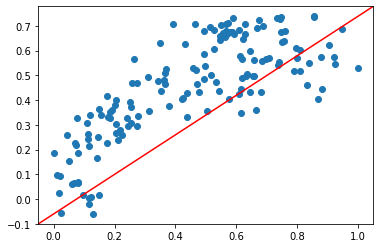

In [237]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(y, y_pred)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show() 

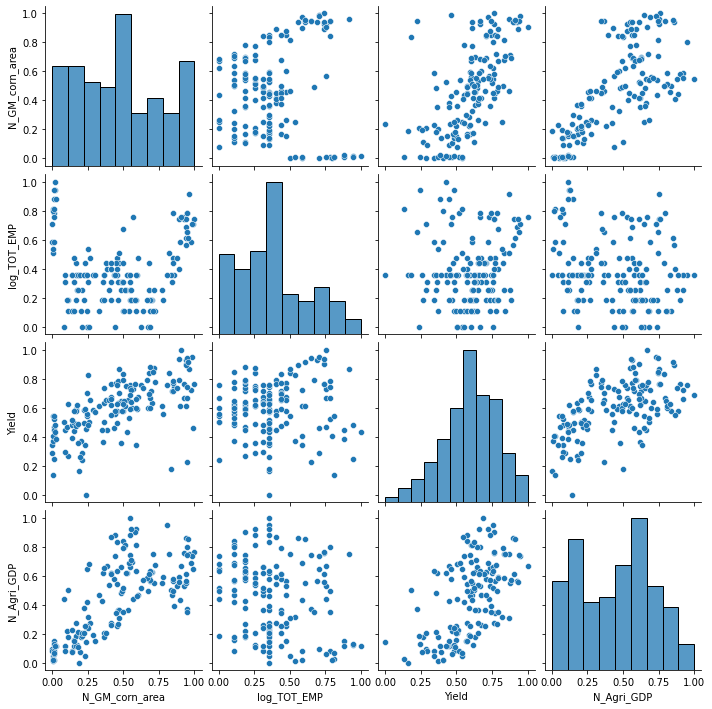

In [238]:
sns.pairplot(nor_corn_table[Features+['N_Agri_GDP']])

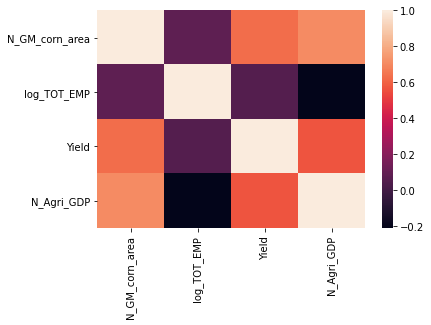

In [239]:
sns.heatmap(nor_corn_table[Features+['N_Agri_GDP']].corr())

In [240]:
nor_corn_table[Features+['N_Agri_GDP']]

,N_GM_corn_area,log_TOT_EMP,Yield,N_Agri_GDP
Year,,,,
2005,0.363671,0.356466,0.503704,0.202081
2005,0.222956,0.185652,0.585185,0.377478
2005,0.568116,0.755736,0.725926,0.437071
2005,0.092316,0.356466,0.444444,0.117273
2005,0.114129,0.185652,0.266667,0.176450
...,...,...,...,...
2019,0.495324,0.670831,0.792593,0.351552
2019,0.180896,0.251912,0.488889,0.108731
2019,0.416482,0.437564,0.659259,0.610043


In [241]:
Features = ['N_GM_corn_area', 'log_TOT_EMP', 'Yield','N_agri_exports']

N_GM_corn_area
log_TOT_EMP
Yield
N_agri_exports


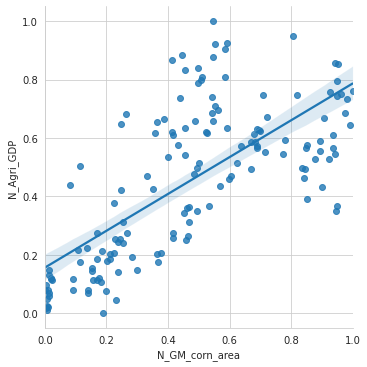

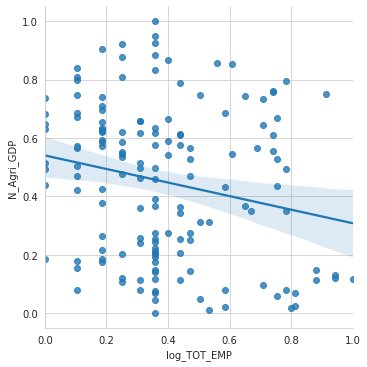

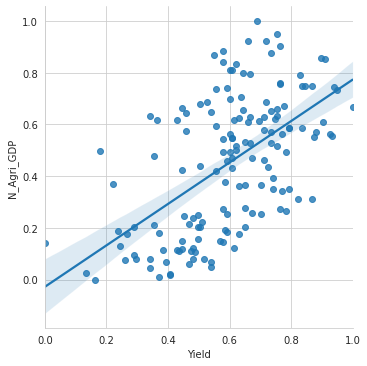

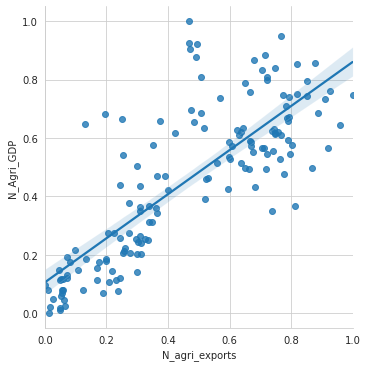

In [242]:
sns.set_style('whitegrid') 
for f in Features:
  print(f)
  sns.lmplot(x=f, y='N_Agri_GDP', data=nor_corn_table)

In [243]:
norm_data_all_states_05 = norm_data_all_states[norm_data_all_states['Year'] == 2005]

In [244]:

norm_data_all_states_09 = norm_data_all_states[norm_data_all_states['Year'] == 2009]
norm_data_all_states_13 = norm_data_all_states[norm_data_all_states['Year'] == 2013]
norm_data_all_states_17 = norm_data_all_states[norm_data_all_states['Year'] == 2017]
norm_data_all_states_19 = norm_data_all_states[norm_data_all_states['Year'] == 2019]

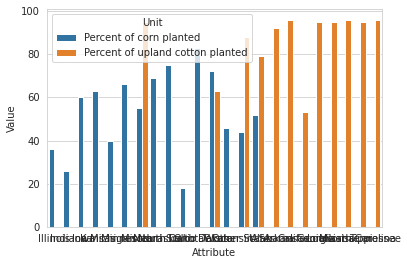

In [246]:
ax = sns.barplot(x="Attribute", y="Value", hue="Unit", data=gm_2005)